# Llama 3.2 Multimodal Prompting

<p style="background-color:#hhh6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note 💻<code>(What's this notebook for)</code>:</b> In this course, we are exploring the Llama 3.2 Model from Meta. <b> https://github.com/meta-llama/llama-models/blob/main/models/llama3_2/MODEL_CARD.md. <b> </p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
from utils import load_env
import os
load_env()

#print(os.environ) print environmental variables
#os.getenv("key") print the value of some environmental variable 'key'
#environmental variables can be set up in an environment.yaml, through the GUI (e.g. Pycharm...)

'\nfrom dotenv import load_dotenv, find_dotenv\n\ndef load_env():\n    _ = load_dotenv(find_dotenv())\n    \n    IN HERE, THERE ARE SOME TOGETHER (?, PROVIDER OF...) API KEYS. THEY NEED TO BE FIRST CREATED WHEN RUNNING LOCALLY \n'

In [25]:
import yaml
# Get environment variables as a dictionary
env_vars = dict(os.environ)

# Define the YAML file name
yaml_file = "environment_var.yml" #ATTENTION, SOME API KEYS NEED TO BE MODIFIED TO THE PERSONAL ID

# Write to a YAML file
with open(yaml_file, "w") as file:
    yaml.dump(env_vars, file, default_flow_style=False)

print(f"Environment variables saved to {yaml_file}") 

Environment variables saved to environment_var.yml


In [ ]:
#todo: crete a function that read the yaml file and set ups the environment

## Text input only question

# Characteristics of Llama3.2 and Llama3.1 models

In [9]:
from utils import llama32 #llama32(messages: -->, model_size=11) 
#t.q. model_size= number of parameters of llama32 model; messages= a list of dictionaries(each one encompassing an intervention (being it from the user or the assistant)) 
from utils import llama31 #(prompt_or_messages: -->, model_size=8, temperature=0, raw=False, debug=False)
#t.q. temperature is the creativity associated with the next prediction, raw=, debug=

In [30]:
messages = [
  {"role": "user",
    "content": "Who wrote the book Charlotte's Web?"}
]
response_32 = llama32(messages, 90)
print(response_32)

In [48]:
response_31 = llama31(messages,70, 1.5) #a higher temperature can lead to inconsistent responses. T E [0, 1. With T = 1, a more creative response is given, not only answering the prompt. 
#Also, evidently, with a higher temperature, the model will take more time
print(response_31)

"Charlotte's Web" was written by the famous American author E.B. White. It was published in 1952 and has become a beloved children's classic.


## Reprompting with new question

In [49]:
messages = [
  {"role": "user",
    "content": "Who wrote the book Charlotte's Web?"},
      {"role": "assistant",
    "content": response_32},
      {"role": "user",
    "content": "3 of the best quotes"}
]

response_32 = llama32(messages,90)
print(response_32)

In [51]:
response_31 = llama31(messages,70)
print(response_31)

Here are three of the best quotes from "Charlotte's Web":

1. "You have been my friend," replied Charlotte. "That in itself is a tremendous thing. I wove my webs for you because I liked you. After all, what's a life anyway? We're born, we live a little while, we die. A spider's life can't help being something of a mess, with all this hurrying backward and forward, all this scurrying around. But you've lived a good life, and I'm proud of you."

2. "It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."

3. "You've got a friend in me, Wilbur. A friend is one of the nicest things you can have, and a good friend is something more."


## Question about an image

In [2]:
from utils import disp_image

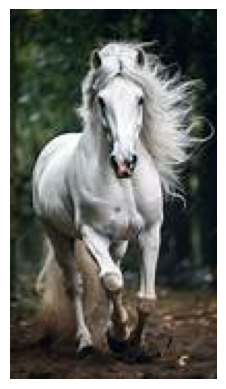

In [55]:
disp_image("images/white_horse.jpg") # Example usage for local image

### Image from a URL

In [56]:
image_url = ("https://raw.githubusercontent.com/meta-llama/"
            "llama-models/refs/heads/main/Llama_Repo.jpeg")
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": image_url}
      }
    ]
  },
]

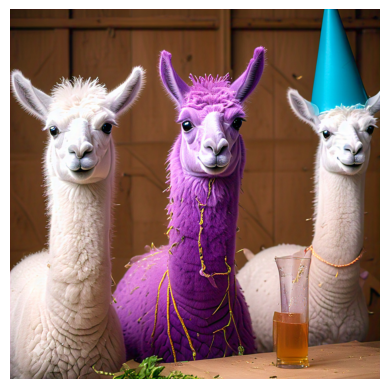

The image depicts three llamas, one of which is purple and wearing a party hat, standing behind a table with a glass of beer on it.


In [57]:
disp_image(image_url)
result = llama32(messages,90)
print(result)

### Using a local image

In [65]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8') #how is this encoding made?

base64_image = encode_image("images/white_horse.jpg")

In [69]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
]

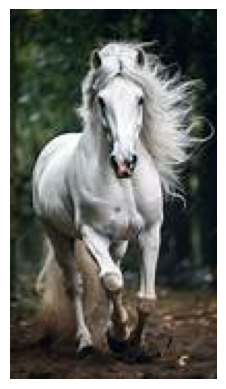

The image depicts a white horse running in the woods.


In [70]:
image_url = "images/white_horse.jpg" #local image
disp_image(image_url)
result = llama32(messages,90)
print(result)

## Follow up question about an image

In [71]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
  {"role": "assistant", "content": result},
  {"role": "user", "content": "could you find a Shakespeare story about the object depicted in the previous image"}
]

In [72]:
result = llama32(messages)
print(result)

The image depicts a white horse, which is a central element in Shakespeare's play "The Tempest." In the play, a white horse is used as a symbol of purity and innocence, and is also associated with the character of Ferdinand, who is the son of the King of Naples. The horse is also used as a means of transportation for Ferdinand and his companions as they journey to the island where the play takes place.


## Define llama32pi( ) helper
### A function for directly defining the messages without writing their format again

In [7]:
def llama32pi(prompt, image_url, model_size=90):
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text",
          "text": prompt},
        {"type": "image_url",
          "image_url": {
            "url": image_url}
        }
      ]
    },
  ]
  result = llama32(messages, model_size)
  return result

In [85]:
base64_image = encode_image("images/white_horse.jpg")
print(llama32pi("describe the image in one sentence",
                f"data:image/jpeg;base64,{base64_image}"))
                #"images/white_horse.jpg")) it needs to be encoded base64
                #"https://raw.githubusercontent.com/meta-llama/"
                #"llama-models/refs/heads/main/Llama_Repo.jpeg"))
               

The image depicts a white horse running in the woods.


## Tire pressure warning

In [ ]:
disp_image("images/tire_pressure.png")

In [ ]:
question = (("What's the problem this is about?"
             " What should be good numbers?"))
#the " " are used to break the line for visualization purposes

In [ ]:
base64_image = encode_image("images/tire_pressure.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

# OCR (Optical Character Recognition) with literature pages
## Multimodal Use Case

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from utils import load_env
load_env()

## Load helper functions

In [3]:
from utils import llama32

In [5]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [5]:
def llama32pi(prompt, image_url, model_size=90):
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text",
          "text": prompt},
        {"type": "image_url",
          "image_url": {
            "url": image_url}
        }
      ]
    },
  ]

  result = llama32(messages, model_size)
  return result

## OCR with extract from 'To Persephone' in they hymns by Homero

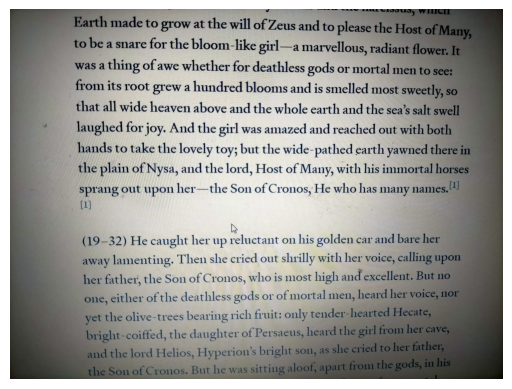

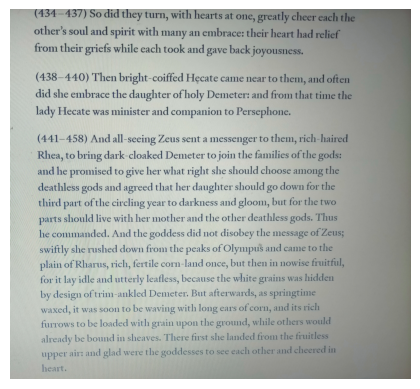

In [8]:
from utils import disp_image
for i in range(1, 3):
  disp_image(f"images/Persephone_{i}.jpg")

In [2]:
question = "Where is Persephone living?"
results = ""
for i in range(1, 3):
    base64_image = encode_image(f"images/Persephone_{i}.jpg")
    res = llama32pi(question, f"data:image/jpeg;base64,{base64_image}")
    results = results + f"{res}\n\n"
print(results)


NameError: name 'encode_image' is not defined

In [23]:
messages = [
    {"role": "user",
     "content": f"""When has Persephone changed from living with her mother to living in the Underworld?
{results}"""
  }
] 
#it would combine the information provided with the information that was trained in
#todo: it would be good to test a use case where the pictures tells the opposite story and try to confuse the AI assistant

In [24]:
response = llama32(messages)
print(response)

According to the text, Persephone has changed from living with her mother to living in the Underworld, but the exact timing is not specified. However, it can be inferred that the change occurred after she was abducted by Hades and became the queen of the Underworld.

In the first passage, Persephone is already living in the Underworld with Hades, indicating that the abduction has already taken place.

In the second passage, Persephone is still living with her mother, Demeter, and the other gods on Olympus, and Demeter is grieving because the earth is barren and unfruitful. This passage likely takes place before the abduction, when Persephone is still with her mother.

Therefore, the change from living with her mother to living in the Underworld likely occurred between the events described in the two passages.


## Handling multiple images

In [30]:
from utils import merge_images #I think the function is correctly updated to handle only two images, either way, it should be soft coded
import matplotlib.pyplot as plt
merged_image = merge_images("images/Persephone_1.jpg",
                            "images/Persephone_2.jpg")
plt.imshow(merged_image)
plt.axis('off')
plt.show()

TypeError: merge_images() missing 1 required positional argument: 'image_3'

In [ ]:
from utils import resize_image
resized_img = resize_image(merged_image)

In [ ]:
base64_image = encode_image("images/resized_image.jpg")
#question = "What's the total charge of all the recipts below?"
question = 'How many times Persephone has travelled?'
result = llama32pi(question,
                      f"data:image/jpeg;base64,{base64_image}")
print(result)

## Choosing the right drink

In [ ]:
disp_image("images/drinks.png")

In [ ]:
question = "I am on a diet. Which drink should I drink?"

In [ ]:
base64_image = encode_image("images/drinks.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

In [ ]:
question = ("Generete nutrition facts of the two drinks " 
            "in JSON format for easy comparison.")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

## Understanding Llama MM model with code implementation

In [ ]:
disp_image("images/llama32mm.png")

In [ ]:
question = ("I see this diagram in the Llama 3 paper. "
            "Summarize the flow in text and then return a "
            "python script that implements the flow.")
base64_image = encode_image("images/llama32mm.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

## Llama 3.1 70B Instruct model speed

In [ ]:
disp_image("images/llama31speed.png")

In [ ]:
question = "Convert the chart to an HTML table."
base64_image = encode_image("images/llama31speed.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

In [ ]:
from IPython.display import HTML
minified_html_table = "<table><thead><tr><th>Model</th><th>Output Tokens per Second</th></tr></thead><tbody><tr><td>Llama 2 1.5B</td><td>217</td></tr><tr><td>Google's PaLM 2 540B</td><td>214</td></tr><tr><td>Google's PaLM 2 540B</td><td>163</td></tr><tr><td>Meta's LLaMA 2 70B</td><td>133</td></tr><tr><td>Meta's LLaMA 2 70B</td><td>129</td></tr><tr><td>Google's T5 3.5B</td><td>123</td></tr><tr><td>OPT-6B</td><td>111</td></tr><tr><td>OPT-6B</td><td>75</td></tr><tr><td>ChatGPT-3.5</td><td>64</td></tr><tr><td>Google's T5 3.5B</td><td>62</td></tr><tr><td>Google's T5 3.5B</td><td>61</td></tr><tr><td>Meta's LLaMA 2 7B</td><td>68</td></tr><tr><td>Meta's LLaMA 2 7B</td><td>38</td></tr><tr><td>Meta's LLaMA 2 7B</td><td>38</td></tr><tr><td>Meta's LLaMA 2 7B</td><td>25</td></tr></tbody></table>"
HTML(minified_html_table)

## Know your fridge

In [ ]:
disp_image("images/fridge-3.jpg")

In [ ]:
question = ("What's in the fridge? What kind of food can be made? Give "
            "me 2 examples, based on only the ingredients in the fridge.")
base64_image = encode_image("images/fridge-3.jpg")
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

### Asking a follow up question

In [ ]:
new_question = "is there banana in the fridge? where?"
messages = [
  {"role": "user", "content": [
      {"type": "text", "text": question},
      {"type": "image_url", "image_url": {"url": f"data:image/jpg;base64,{base64_image}"}}
  ]},
  {"role": "assistant", "content": result},
  {"role": "user", "content": new_question}
]
result = llama32(messages)
print(result)

In [ ]:
def llama32repi(question, image_url, result, new_question, model_size=90):
    messages = [
      {"role": "user", "content": [
          {"type": "text", "text": question},
          {"type": "image_url", "image_url": {"url": image_url}}
      ]},
      {"role": "assistant", "content": result},
      {"role": "user", "content": new_question}
    ]
    result = llama32(messages, model_size)
    return result

## Math grader


In [ ]:
disp_image("images/math_hw3.jpg")

In [ ]:
prompt = ("Check carefully each answer in a kid's math homework, first "
          "do the calculation, then compare the result with the kid's "
          "answer, mark correct or incorrect for each answer, and finally"
          " return a total score based on all the problems answered.")
base64_image = encode_image("images/math_hw3.jpg")
result = llama32pi(prompt, f"data:image/jpg;base64,{base64_image}")
print(result)

## Tool calling with image

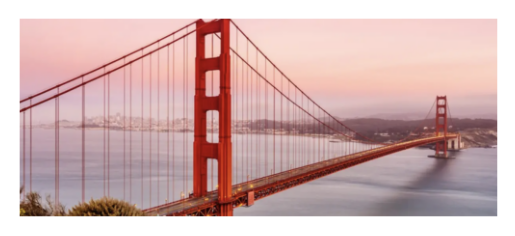

In [31]:
disp_image("images/golden_gate.png")

In [32]:
question = "What's the current weather of the place shown in the picture?"
base64_image = encode_image("images/golden_gate.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

I can't provide you with the current weather of the Golden Gate Bridge as I don't have access to real-time information. However, I can suggest checking a weather website or app, such as AccuWeather or Dark Sky, for the most up-to-date information on the current weather conditions in San Francisco.


In [33]:
question = "To what place belongs this image to?"
base64_image = encode_image("images/golden_gate.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

The image belongs to the Golden Gate Bridge, which is located in San Francisco, California.


In [36]:
weather_question = ("What is the current weather in the location "
                 "mentioned in the text below: \n"  f"{result}")

from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%d %B %Y")

#how should this be changed when running locally?
messages = [
    {"role": "system",
     "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2024
Today Date: {formatted_date}
"""},
    {"role": "user",
     "content": weather_question}
  ]
print(llama32(messages))

<|python_tag|>brave_search.call(query="current weather in San Francisco, California")


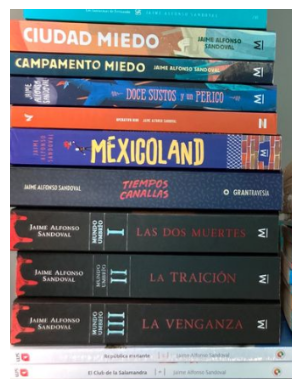

In [3]:
disp_image("images/books.png")

In [10]:
question = ("What's the language in which these books are written")
base64_image = encode_image("images/books.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

Exception: {'message': 'Invalid API key provided. You can find your API key at https://api.together.xyz/settings/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}

In [ ]:
population_question = ("What is the current population of the country where "
                 "there are more native speakers of: \n"  f"{result}")

from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%d %B %Y")

#how should this be changed when running locally?
messages = [
    {"role": "system",
     "content":  f"""
Environment: ipython
Tools: brave_search, wolfram_alpha
Cutting Knowledge Date: December 2024
Today Date: {formatted_date}
"""},
    {"role": "user",
     "content": population_question}
  ]
print(llama32(messages))
#To answer this question, I need to find out the country with the most native Spanish speakers and then look up its population. --> this answer was illed provided just because I was not adding the ? at the end of the prompt
#when added, this is the answer: According to the United Nations, Mexico has the most native speakers of Spanish. As of 2021, Mexico's population is approximately 131 million.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!cat utils.py

import requests
import json

from dotenv import load_dotenv
import os
_ = load_dotenv() #loads 'TOGETHER_API_KEY'


def llama31(prompt_or_messages, model_size=8, temperature=0, raw=False, debug=False):
    model = f"meta-llama/Meta-Llama-3.1-{model_size}B-Instruct-Turbo"
    if isinstance(prompt_or_messages, str):
        prompt = prompt_or_messages
        url = f"{os.getenv('DLAI_TOGETHER_API_BASE', 'https://api.together.xyz')}/v1/completions"
        payload = {
            "model": model,
            "temperature": temperature,
            "prompt": prompt
        }
    else:
        messages = prompt_or_messages
        url = f"{os.getenv('DLAI_TOGETHER_API_BASE', 'https://api.together.xyz')}/v1/chat/completions"
        payload = {
            "model": model,
            "temperature": temperature,
            "messages": messages
        }

    if debug:
        print(payload)

    headers = {
        "Accept": "application/json",
        "Content-Type": "application/json",
    

## Using the "user" and "assistant" roles
### Complete prompt format

In [3]:
question = "Who wrote the book Charlotte's Web?"

prompt = (
    "<|begin_of_text|>"                              # start of prompt
    "<|start_header_id|>user<|end_header_id|>"       # user header
    f"{question}"                                    # user input
    "<|eot_id|>"                                     #end of turn
    "<|start_header_id|>assistant<|end_header_id|>"  #assistant header
)

print(prompt)

#for more info, see https://www.llama.com/docs/model-cards-and-prompt-formats/llama3_1/#-supported-roles-
#for more information, see https://github.com/meta-llama/llama-models/blob/main/models/llama3_2/text_prompt_format.md

<|begin_of_text|><|start_header_id|>user<|end_header_id|>Who wrote the book Charlotte's Web?<|eot_id|><|start_header_id|>assistant<|end_header_id|>


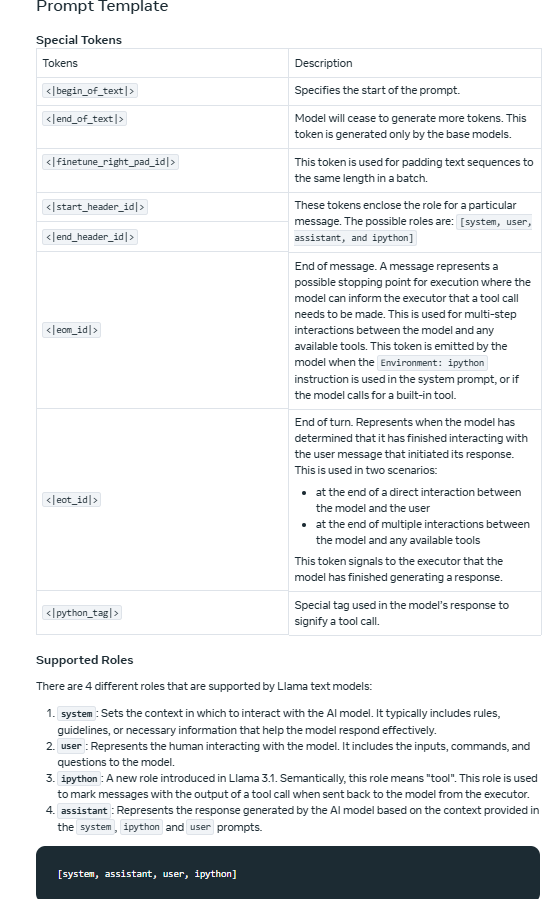

In [11]:
from IPython.display import Image
Image(".\images\prompt_format.png")

In [5]:
from  utils import llama31
response = llama31(prompt,8)
print(response)



The book "Charlotte's Web" was written by E.B. White. It was first published in 1952 and has since become a beloved children's classic. E.B. White was an American author, best known for his children's books, including "Charlotte's Web" and "Stuart Little".


In [7]:
from utils import cprint
response = llama31(prompt,8, raw=True) #useful information when buying services in web providers (e.g. AWS, Azure, IBM Cloud...)

cprint(response)

{
    "id": "91c9b4ee0e6e67b5",
    "object": "text.completion",
    "created": 1741346460,
    "model": "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
    "prompt": [],
    "choices": [
        {
            "text": "\n\nThe book \"Charlotte's Web\" was written by E.B. White. It was first published in 1952 and has since become a beloved children's classic. E.B. White was an American author, best known for his children's books, including \"Charlotte's Web\" and \"Stuart Little\".",
            "finish_reason": "stop",
            "seed": 4601699932031582000,
            "logprobs": null,
            "index": 0
        }
    ],
    "usage": {
        "prompt_tokens": 16,
        "completion_tokens": 64,
        "total_tokens": 80
    }
}



# Multi-turn chat

In [8]:
follow_up_question = "Three best quotes in it"
follow_up_prompt = (
    "<|begin_of_text|>"                              # start of prompt
    "<|start_header_id|>user<|end_header_id|>"        # past  
    f"{question}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>assistant<|end_header_id|>"   # past
    f"{response}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>user<|end_header_id|>"       # new
    f"{follow_up_question}"                          # new
    "<|eot_id|>"                                     # new
    "<|start_header_id|>assistant<|end_header_id|>"  # new
)

In [9]:
follow_up_response = llama31(follow_up_prompt)
print(follow_up_response)



Here are three of the most famous and meaningful quotes from "Charlotte's Web":

1. **"It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."**

This quote highlights the special bond between Charlotte and Wilbur, and also showcases E.B. White's writing style, which is both simple and profound.

2. **"You have been my friend. That in itself is a tremendous thing. I wove my web for you, I did it for you."**

This quote captures the selfless love and friendship that Charlotte shows to Wilbur, and also serves as a reminder of the importance of true friendship in our lives.

3. **"It's not often that someone comes along who has a real need for a friend."**

This quote is a poignant reflection on the loneliness and isolation that many animals (and humans) experience, and serves as a reminder of the importance of empathy and compassion in our relationships with others.

These quotes have become iconic in children's literature and continue to i

In [11]:
from IPython.display import Markdown, display
display(Markdown(follow_up_response))



Here are three of the most famous and meaningful quotes from "Charlotte's Web":

1. **"It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."**

This quote highlights the special bond between Charlotte and Wilbur, and also showcases E.B. White's writing style, which is both simple and profound.

2. **"You have been my friend. That in itself is a tremendous thing. I wove my web for you, I did it for you."**

This quote captures the selfless love and friendship that Charlotte shows to Wilbur, and also serves as a reminder of the importance of true friendship in our lives.

3. **"It's not often that someone comes along who has a real need for a friend."**

This quote is a poignant reflection on the loneliness and isolation that many animals (and humans) experience, and serves as a reminder of the importance of empathy and compassion in our relationships with others.

These quotes have become iconic in children's literature and continue to inspire readers of all ages with their wisdom and kindness.

#### Without message history    
    remember! the model hasn't got a memory

In [12]:
question = "Three Best quotes"
prompt = (
    "<|begin_of_text|>"  
    "<|start_header_id|>user<|end_header_id|>"
    f"{question}"
    "<|eot_id|>"
    "<|start_header_id|>assistant<|end_header_id|>"
)
response = llama31(prompt,8)
display(Markdown(response))



Here are three of the best quotes from various sources:

1. **"Believe you can and you're halfway there."** - Theodore Roosevelt

This quote emphasizes the importance of having a positive mindset and believing in oneself. It's a great reminder that our thoughts and attitudes can have a significant impact on our success and achievements.

2. **"The future belongs to those who believe in the beauty of their dreams."** - Eleanor Roosevelt

This quote highlights the power of imagination and the importance of having a clear vision for our lives. It encourages us to dream big and believe in the possibility of achieving our goals.

3. **"It does not matter how slowly you go as long as you do not stop."** - Confucius

This quote reminds us that progress is often slow and incremental, but it's the consistent effort and perseverance that ultimately lead to success. It's a great reminder to stay focused and motivated, even when faced with challenges and setbacks.

I hope you find these quotes inspiring and thought-provoking!

## Using "system" role

In [13]:
question = "Three Great quotes"
system_message = (
    "You are an expert in quotes about sports " 
    "You provide just the quotes and no commentary. "
    "Reply in markdown"
)

prompt = (
    "<|begin_of_text|>"
    "<|start_header_id|>system<|end_header_id|>"
    f"{system_message}"
    "<|eot_id|>"    
    "<|start_header_id|>user<|end_header_id|>"
    f"{question}"
    "<|eot_id|>"
    "<|start_header_id|>assistant<|end_header_id|>"
)
response = llama31(prompt,70)
display(Markdown(response))



* "Champions are made from something they have deep inside them - a desire, a dream, a vision." - Muhammad Ali
* "It's not whether you get knocked down, it's whether you get up." - Vince Lombardi
* "Hard work, dedication, and a willingness to learn are the keys to success in any field, including sports." - Michael Jordan

In [14]:
follow_up_question = "three more"
follow_up_prompt = (
    "<|begin_of_text|>"
    "<|start_header_id|>system<|end_header_id|>"      # system
    f"{system_message}"                               # system
    "<|eot_id|>"                                      # system
    "<|start_header_id|>user<|end_header_id|>"        # past
    f"{question}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>assistant<|end_header_id|>"   # past
    f"{response}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>user<|end_header_id|>"         # new
    f"{follow_up_question}"                            # new     
    "<|eot_id|>"                                       # new
    "<|start_header_id|>assistant<|end_header_id|>"    # new
)
response = llama31(follow_up_prompt)
display(Markdown(response))



* "The only way to do great work is to love what you do." - Tom Landry
* "Don't count the days, make the days count." - Muhammad Ali
* "Excellence is not a destination; it is a continuous journey of improvement." - Pat Riley

# Chat with Llama using higher-level message

In [15]:
prompt = (
    "<|begin_of_text|>"                              # start of prompt
    "<|start_header_id|>user<|end_header_id|>"       # user header
    "Who wrote the book Charlotte's Web?"                                    # user input
    "<|eot_id|>"                                     #end of turn
    "<|start_header_id|>assistant<|end_header_id|>"  #assistant header
)
response = llama31(prompt,8)
print(response)



The book "Charlotte's Web" was written by E.B. White. It was first published in 1952 and has since become a beloved children's classic. E.B. White was an American author, best known for his children's books, including "Charlotte's Web" and "Stuart Little".


In [16]:
messages = [
    {
      "role": "user",
      "content": "Who wrote the book Charlotte's Web?"
    }
  ]
response = llama31(messages,8)
print(response)

The book "Charlotte's Web" was written by E.B. White.


In [17]:
follow_up_question = "Three Best quotes"

messages = [
    {
      "role": "system",
      "content": "You are an terse expert in children's literature"
    },
    {
      "role": "user",
      "content": "Who wrote the book Charlotte's Web?"
    },
    {
      "role": "assistant",
      "content": response
    },
    {
      "role": "user",
      "content": follow_up_question
    }
  ]

response = llama31(messages,8)
print(response)

Here are three notable quotes from "Charlotte's Web":

1. "It doesn't take a lot of brainpower to be kind."
2. "You have been my friend. That in itself is a tremendous thing."
3. "It's not often that someone comes along who is a true friend and a good writer."


In [19]:
class Conversation:
    def __init__(self, system=""):
        self.messages = []
        if system:
            self.messages.append({"role": "system", "content": system})
    def generate(self, user_question, model=8, temp=0):
        self.messages.append({"role": "user", "content":user_question})
        response = llama31(self.messages, model, temperature=temp)
        self.messages.append({"role":"assistant", "content":response})
        return response
        

In [20]:
system_message = "You are a terse expert in Childrens literature." 
conv = Conversation(system_message)
conv.generate("Who wrote the book Charlotte's Web?")

'E.B. White wrote the book "Charlotte\'s Web".'

In [22]:
response = conv.generate("What are three quotes")
display(Markdown(response))

Here are three quotes from "Charlotte's Web":

1. "Some pigs are beautiful, but some are just pigs."
2. "It's not often that someone comes along who is a true friend and a good writer. Charlotte was both."
3. "Wherever you go becomes a part of you somehow."

In [23]:
conv.messages

[{'role': 'system',
  'content': 'You are a terse expert in Childrens literature.'},
 {'role': 'user', 'content': "Who wrote the book Charlotte's Web?"},
 {'role': 'assistant',
  'content': 'E.B. White wrote the book "Charlotte\'s Web".'},
 {'role': 'user', 'content': 'What are three quotes'},
 {'role': 'assistant',
  'content': 'Here are three quotes from "Charlotte\'s Web":\n\n1. "Some pigs are beautiful, but some are just pigs."\n2. "It\'s not often that someone comes along who is a true friend and a good writer. Charlotte was both."\n3. "Wherever you go becomes a part of you somehow."'}]

## Multi-lingual Llama

In [24]:
system_message = (
    "Answer in 8 languages: English, German, French, Italian," 
    "Portuguese, Hindi, Spanish, and Thai"
)
ml_conv = Conversation(system_message)
response = ml_conv.generate("3 basic phrases")
display(Markdown(response))

Here are 3 basic phrases in 8 languages:

**English**
1. Hello - Hello
2. Thank you - Thank you
3. Goodbye - Goodbye

**German**
1. Hallo - Hello
2. Danke - Thank you
3. Auf Wiedersehen - Goodbye

**French**
1. Bonjour - Hello
2. Merci - Thank you
3. Au revoir - Goodbye

**Italian**
1. Ciao - Hello
2. Grazie - Thank you
3. Arrivederci - Goodbye

**Portuguese**
1. Olá - Hello
2. Obrigado/Obrigada - Thank you
3. Tchau - Goodbye

**Hindi**
1. नमस्ते (Namaste) - Hello
2. धन्यवाद (Dhanyavad) - Thank you
3. अलविदा (Alvida) - Goodbye

**Spanish**
1. Hola - Hello
2. Gracias - Thank you
3. Adiós - Goodbye

**Thai**
1. สวัสดี (Sawatdee) - Hello
2. ขอขอบคุณ (Khop Khun Krap) - Thank you
3. สวัสดีครับ/ค่ะ (Sawatdee Khrap/Ka) - Goodbye

## Chatbot App

In [25]:
code_query = """
I need a Python script for a Gradio chatbot app that should be run
within a Jupyter notebook.
1) When calling the LLM, use this class, which is already defined,
    dont redefine it:
class Conversation:
    def __init__(self, system=""):
        self.messages = []
        if system:
            self.messages.append({"role": "system", "content": system})

    def generate(self, user_question, model=8, temp=0):
        self.messages.append({"role": "user", "content": user_question})
        response = llama31(self.messages, model, temperature=temp)  
        self.messages.append({"role": "assistant", "content": response})
        return response
2) initialize the class with a system message of:
    "You are an expert in literature. You provide brief replies"
3) the llama() function is defined like this:
    def llama(prompt_or_messages, model_size=8, 
              temperature=0, raw=False, debug=False):
    and returns a reponse in a string. Don't redefine this.
    valid model sizes are 8, 70 and 405.
"""
coder_system_message = (
    "You are an expert writing python Gradio chatbots" 
)
coder_conv = Conversation(coder_system_message)
response = coder_conv.generate(code_query, 405)
print(response)

Here's a Python script for a Gradio chatbot app that you can run within a Jupyter notebook:

```python
import gradio as gr

# Initialize the Conversation class with a system message
conversation = Conversation("You are an expert in literature. You provide brief replies.")

# Define a function to handle user input
def chatbot(user_input, model_size, temperature):
    # Generate a response using the Conversation class
    response = conversation.generate(user_input, model=model_size, temp=temperature)
    return response

# Create a Gradio interface for the chatbot
demo = gr.Interface(
    fn=chatbot,
    inputs=[
        gr.Textbox(label="User Input"),
        gr.Radio(label="Model Size", choices=[8, 70, 405], value=8),
        gr.Slider(label="Temperature", minimum=0, maximum=1, step=0.1, value=1)
    ],
    outputs=gr.Textbox(label="Chatbot Response"),
    title="Literature Expert Chatbot",
    description="Ask a question about literature and get a brief response."
)

# Launch the Gra

In [27]:
# note, the final line was hand edited to add "server_name="0.0.0.0" to run in the course environment. CHANGE IT ACCORDINGLY

import gradio as gr

# Initialize the conversation with a system message
conversation = Conversation("You are an expert in literature. You provide brief replies.")

# Define a function to generate a response to the user's input
def generate_response(user_input, model_size, temperature):
    try:
        model_size = int(model_size)
        if model_size not in [8, 70, 405]:
            return "Invalid model size. Please choose from 8, 70, or 405."
        temperature = float(temperature)
        if temperature < 0 or temperature > 1:
            return "Invalid temperature. Please choose a value between 0 and 1."
        response = conversation.generate(user_input, model=model_size, temp=temperature)
        return response
    except Exception as e:
        return str(e)

# Create a Gradio interface for the chatbot
demo = gr.Interface(
    fn=generate_response,
    inputs=[
        gr.Textbox(label="User Input"),
        gr.Radio(label="Model Size", choices=["8", "70", "405"]),
        gr.Slider(label="Temperature", minimum=0, maximum=1, step=0.1, value=0)
    ],
    outputs=gr.Textbox(label="Response"),
    title="Literature Expert Chatbot",
    description="Ask a question about literature and get a brief response from an expert."
)

# Launch the Gradio app
demo.launch(server_name="0.0.0.0", share=True)

Running on local URL:  https://0.0.0.0:7861
Running on public URL: https://8f8a25140df9c73ead.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# A few more examples

## Compare with different sized Llama chat models

By default, the llama31 call uses the Llama 3.1 8B Instruct model. To see how the 70B or 405B model responds, simply pass 70 or 405 after prompt. For example, let compare how the 3 different sized Llama 3.1 chat models respond to the question about a quote in Hemingway's classic The Old Man and the Sea.

In [28]:
question = "The quote that starts with 'Everything about him is old' in The Old Man and the Sea"

prompt = f"""<|begin_of_text|><|start_header_id|>user<|end_header_id|>

{question}<|eot_id|><|start_header_id|>assistant<|end_header_id|>"""

response = llama31(prompt)
print(response)



The quote that starts with "Everything about him is old" is from Ernest Hemingway's novel "The Old Man and the Sea". The full quote is:

"Everything about him was old except his eyes and they were the same color the sea had been in that morning when he came out."

This quote sets the tone for the rest of the novel, emphasizing the old man's age and weariness, while also hinting at the enduring power of his spirit and his connection to the natural world.


If you like Hemingway, you know Llama 3.1 8B is hallucinating a bit, and "old before they were young"? Now try to see if 70B does better.

In [29]:
response = llama31(prompt, 70)
print(response)



The quote you're thinking of is:

"Everything about him was old except his eyes and they seemed to contain a deep and unutterable wisdom."

This is from the opening paragraph of Ernest Hemingway's novella "The Old Man and the Sea".


The response makes more sense, but definitely not Hemingway would've written. In fact, it'd hurt the eyes of his fans. Let's hope 405 will cure the pain.

In [30]:
response = llama31(prompt, 405)
print(response)



You're thinking of the famous quote from Ernest Hemingway's "The Old Man and the Sea"!

The full quote is:

"Everything about him was old except his eyes and they were the same color as the sea and were cheerful and undefeated."

Isn't that a beautiful and poignant description of the old man, Santiago?
